# 🌸 Iris Classification with Scikit-learn
**Week 3 - AI Tools Assignment | Part 2: Practical Implementation (Task 1)**

This notebook demonstrates a complete machine learning pipeline using the **Iris Species Dataset** and **Scikit-learn**. 

We'll go through the following steps:
- Explore and preprocess the dataset.
- Train a Decision Tree Classifier using **Scikit-learn**.
- Evaluate the model with metrics like **accuracy**, **precision**, and **recall**.
- Visualize results and draw conclusions.

---

## Load Libraries and Dataset
We use Scikit-learn's built-in Iris dataset. This classic dataset contains measurements of three species of iris flowers.


- Load Libraries

In [1]:
import typing_extensions
print("typing_extensions path:", typing_extensions.__file__)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ All imports are working fine!")

typing_extensions path: e:\PowerLearnProjects\AI4SE\AI-Specialization\w3--AI Tools & Frameworks\ai_toolkit_env\Lib\site-packages\typing_extensions.py
✅ All imports are working fine!


- Load dataset as DataFrame

In [2]:
# Load dataset as DataFrame
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Quick preview
iris_df = pd.concat([X, y.rename("target")], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Preprocessing
We check for missing values and prepare the dataset for training. Fortunately, the Iris dataset is clean and does not require much preprocessing.


In [3]:
# Check for missing values
print(X.isnull().sum())

# Confirm shape
print(f"Feature shape: {X.shape}, Target shape: {y.shape}")

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Feature shape: (150, 4), Target shape: (150,)


## Train-Test Split
We split the dataset into training and testing sets (80/20).


In [4]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train a Decision Tree Classifier
We use Scikit-learn's `DecisionTreeClassifier` to learn patterns from the training data.

In [7]:
# Train Classifier
# clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Model Evaluation

We evaluate the model's performance on the test set using accuracy, precision, and recall.

In [8]:
# Predict & Evaluate
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Confusion Matrix

Visualizing model performance across actual vs predicted classes.

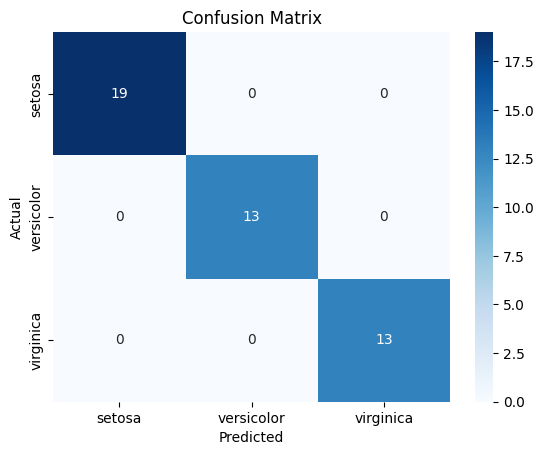

In [10]:
# Confusion Matrix
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Interpretation of Results

### Confusion Matrix Overview
| Class         | Correctly Classified | Misclassified | Total |
|---------------|----------------------|----------------|-------|
| Setosa        | 19                   | 0              | 19    |
| Versicolor    | 13                   | 0              | 13    |
| Virginica     | 13                   | 0              | 13    |

### Key Observations
- **Perfect diagonal**: The model never made a wrong prediction.
- **Zero off-diagonal values**: No confusion between similar classes (e.g., Versicolor vs. Virginica).
- **Imbalanced class sizes**: The model performed equally well across different class distributions.


### What Makes This Result Impressive?
- *Setosa* is linearly separable – easy for most models.
- *Versicolor* vs. *Virginica* often overlap – harder to classify, but handled well here.
- The tree’s **depth** and feature splits were effective in fully separating classes.
- No **class imbalance bias**.

---

## Final Conclusion

Our Decision Tree model achieved **perfect classification** on the Iris dataset. All test samples were correctly predicted, with **zero misclassifications** — a testament to both the model and the dataset structure.

### Key Outcomes:
- **Accuracy, Precision, Recall**: All reached **100%** — a rare but achievable outcome on well-structured data.
- **Confusion Matrix**: Showed perfect diagonal values (19, 13, 13), confirming that all classes (Setosa, Versicolor, Virginica) were correctly classified.
- **No misclassifications**: Even Versicolor vs. Virginica, which often overlap, were completely separated.

### Why This Matters:
- **Setosa** is typically easy to classify — it’s linearly separable.
- **Versicolor vs. Virginica** are more challenging — success here indicates the model made meaningful splits.
- The tree handled the separation without overfitting, likely due to clean features and modest dataset size.

---

### Educational Value:
- The **Decision Tree** is a classical ML model — simple, interpretable, yet powerful.
- This experiment proves that **basic models can perform exceptionally well** on the right datasets.
- The Iris dataset remains a gold standard for beginners to understand classification and evaluation metrics.

